In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy.interpolate import griddata
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)



pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


cuda:0


In [2]:
global temp_list
temp_list = []
Agent_number_n=3;
Alpha = 0.666 

# Hyper Parameters
echo = 20001
BATCH_SIZE = 64
LR_G = 0.001           # learning rate for generator
LR_D = 0.001           # learning rate for discriminator
N_IDEAS = Agent_number_n             # think of this as number of ideas for generating an art work (Generator)
ART_COMPONENTS = Agent_number_n     # it could be total point G can draw in the canvas

Is_GAN = False # if use Gan

def Generate_distribution(Agent_number_n):
    return sorted(np.random.rand(Agent_number_n), reverse=True)
    #return np.random.normal(normalloc,normalscale,Agent_number_n)

In [3]:
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    temp_list = np.array(temp_list)
    x_list = np.array(x_list)
    return temp_list,S,x_list
    

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    temp_list = np.array(temp_list)
    return temp_list,S
    

def read_testing_data():
    for i in range(10000):
        appen_test(Generate_distribution(Agent_number_n));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(testing_data)
print(testing_label)

[[[0.32635318 0.09366478]
  [0.97307688 0.09366478]
  [0.97307688 0.32635318]]

 [[0.00684944 0.90958637]
  [0.68477888 0.90958637]
  [0.68477888 0.00684944]]

 [[0.9978304  0.32153116]
  [0.05276022 0.32153116]
  [0.05276022 0.9978304 ]]

 ...

 [[0.82519237 0.84780461]
  [0.5367951  0.84780461]
  [0.5367951  0.82519237]]

 [[0.6579933  0.93599882]
  [0.8501429  0.93599882]
  [0.8501429  0.6579933 ]]

 [[0.32206343 0.84586518]
  [0.40387372 0.84586518]
  [0.40387372 0.32206343]]]
[1.39309484 1.60121469 1.37212177 ... 2.20979208 2.44413503 1.57180233]


In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(testing_data[index][i][0])
        y_list.append(testing_data[index][i][1])
        h = h_function(testing_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    result_list.append(sum(h_list)/testing_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list),sum(result_list)/len(result_list))

2.3333212803158285 2.0 0.3333212803158285 2.102013617189455


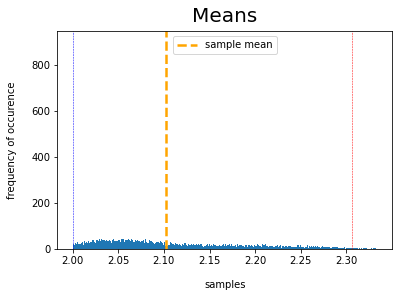

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)

class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()
        
        self.input_dim = (Agent_number_n-1)
        self.hidden_dim = 64
        self.output_dim = 1
        self.hidden_layer_count = 6 
        
        current_dim = self.input_dim
        self.layers = torch.nn.ModuleList()
        for i in range(self.hidden_layer_count):
            self.layers.append(torch.nn.Linear(current_dim, self.hidden_dim))
            current_dim = self.hidden_dim
        self.layers.append(torch.nn.Linear(current_dim, self.output_dim))

    def calculate(self, value_list):
        h = value_list
        for layer in self.layers:
            h = torch.relu(layer(h))
        return h

    def forward(self, input_list,input_label,label):
        global iteration,echo,target_order
        loss1 = 0
        loss2 = 0
        loss3 = 0
        input_list = torch.from_numpy(
            np.array(input_list)).to(dev).type(torch.float32)
        h_list = []

        for i in range(Agent_number_n):
            h = self.calculate(input_list[i])
            h_list.append(h)
#             loss3 += torch.square(h_function_2(input_list)-h2[1])
            
        input_label = torch.from_numpy(
            np.array(input_label)).to(dev).type(torch.float32)
        sum_h = torch.sum(torch.cat(h_list)).to(dev)


        loss1 = torch.where((Agent_number_n-1)*input_label>sum_h,
                        torch.square(((Agent_number_n-1)*input_label-sum_h)),
                        torch.zeros(1).to(dev)
                      )

        loss2 = torch.where((Agent_number_n-Alpha)*input_label<sum_h,
                        torch.square((sum_h-(Agent_number_n-Alpha)*input_label))/10000,
                        torch.zeros(1).to(dev)
                      )


        return loss1,loss2

In [7]:
def redistribution_value_function(input_tensor):
    S = torch.max(torch.sum(input_tensor), torch.ones(1).to(dev))
    temp_list = []


    for i in range(Agent_number_n):
        temp = []
        
        for j in range(Agent_number_n):
            if(i != j):
                temp .append(input_tensor[j])
                
        temp = torch.stack(temp)
        temp_list.append(temp)
    return torch.stack(temp_list), S

GeneratorNet = nn.Sequential(                      # Generator
    # random ideas (could from normal distribution)
    nn.Linear(N_IDEAS, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    # making a painting from these random ideas
    nn.Linear(64, ART_COMPONENTS),
    nn.Sigmoid(),
)

In [8]:
random.seed(2000)
torch.manual_seed(256)
DiscriminatorNet  = Net()
DiscriminatorNet.apply(weight_init)
GeneratorNet.apply(weight_init)
DiscriminatorNet = torch.load("save/Deep_learning_D_3_2")
if(Is_GAN):
    GeneratorNet = torch.load("save/Deep_learning_G_3_2")
DiscriminatorNet.to(dev)
GeneratorNet.to(dev)

opt_D = torch.optim.Adam(DiscriminatorNet.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(GeneratorNet.parameters(), lr=LR_G)


scheduler_D = torch.optim.lr_scheduler.StepLR(opt_D, step_size=100, gamma=0.98)
scheduler_G = torch.optim.lr_scheduler.StepLR(opt_G, step_size=100, gamma=0.98)

index_train_list = []
index_test_list = []
train_losses = []
test_losses = []

In [9]:
for iteration in range(int(echo)):

    temp_number = 0
    total_batch_loss = 0 
        
    loss2_list = []
    loss1_sum = 0
    loss2_sum = 0
    denominator = 0
    for index in range(0, BATCH_SIZE):
        training_data_i, training_label, training_data = appen_train(
            Generate_distribution(Agent_number_n))
        h_loss1, h_loss2 = DiscriminatorNet(training_data_i, training_label,
                                       training_data)
        denominator += 1
        loss1_sum += h_loss1
        loss2_sum += h_loss2

    loss_sum = torch.sum(loss1_sum + loss2_sum)
    loss = (loss_sum) / denominator 
    total_batch_loss +=float(loss_sum)

    opt_D.zero_grad()
    loss.backward()
    opt_D.step()

    temp_number = iteration
    index_train_list.append(iteration)
    train_losses.append(total_batch_loss)

    if (iteration%100 == 0):
        print(temp_number,loss,float(loss1_sum),float(loss2_sum))
    ## Gan 
        if(Is_GAN):## Gan Work traning GeneratorNet

            DiscriminatorNet.requires_grad = True
            GeneratorNet.requires_grad = True


            for step in range(100):
                # real painting from artist
                G_ideas = torch.randn(BATCH_SIZE, N_IDEAS,
                                      requires_grad=True).to(dev)  # random ideas\n
                # fake painting from G (random ideas)

                G_values = GeneratorNet(G_ideas)
                G_values , indices = torch.sort(G_values, descending=True)
            #     print(artist_paintings)
            #     print(G_paintings)

                result_list = []
                for index in range(BATCH_SIZE):
                    h_list = []
                    value_list_tensor, S_tensor = redistribution_value_function(
                        G_values[index])
                    for i in range(Agent_number_n):
                        h = DiscriminatorNet.calculate(
                            value_list_tensor[i].cuda().type(torch.float32))
                        h_list.append(h)
                    h_list = torch.stack(h_list)
                    result_list.append(torch.sum(h_list)/S_tensor.cuda())
                result_list = torch.stack(result_list)

                diff_loss = torch.max(result_list)-torch.min(result_list)
                G_loss = torch.max(- diff_loss)

                opt_G.zero_grad()
                G_loss.backward()
                opt_G.step()

            # real painting from artist
                G_ideas = torch.randn(BATCH_SIZE, N_IDEAS,
                                      requires_grad=True).to(dev)  # random ideas\n
                # fake painting from G (random ideas)

                G_values = GeneratorNet(G_ideas)
                G_values , indices = torch.sort(G_values, descending=True)
            #     print(artist_paintings)
            #     print(G_paintings)

                result_list = []
                for index in range(BATCH_SIZE):
                    h_list = []
                    value_list_tensor, S_tensor = redistribution_value_function(
                        G_values[index])
                    for i in range(Agent_number_n):
                        h = DiscriminatorNet.calculate(
                            value_list_tensor[i].cuda().type(torch.float32))
                        h_list.append(h)
                    h_list = torch.stack(h_list)
                    result_list.append(torch.sum(h_list)/S_tensor.cuda())
                result_list = torch.stack(result_list)

                diff_loss = torch.max(result_list)-torch.min(result_list)

                D_loss = torch.where((Agent_number_n-1)>torch.min(result_list),
                    torch.square(((Agent_number_n-1)-torch.min(result_list))),
                    torch.zeros(1).to(dev)
                  )   + torch.where((Agent_number_n-Alpha)<torch.max(result_list),
                                torch.square((torch.max(result_list)-(Agent_number_n-Alpha)))/10000,
                                torch.zeros(1).to(dev)
                              )


                opt_D.zero_grad()
                D_loss.backward()
                opt_D.step()
                
            print("Gan:",G_loss,D_loss)
            print()

        result_list = []
        for index in range(len(testing_data)):
            h_list = []
            for i in range(Agent_number_n):
                h = DiscriminatorNet.calculate(
                    torch.tensor(testing_data[index][i]).to(dev).type(
                        torch.float32))
                h_list.append(float(h))
            result_list.append(sum(h_list) / testing_label[index])
        print(max(result_list), min(result_list),
              max(result_list) - min(result_list),
              (sum(result_list) / len(result_list) - min(result_list))+ Agent_number_n-1 - min(min(result_list),Agent_number_n-1) )

        index_test_list.append(iteration)
        test_losses.append(
            (sum(result_list) / len(result_list) - min(result_list))+ Agent_number_n-1 - min(min(result_list),Agent_number_n-1) )
        print()
        index_test_list.append(iteration)
        test_losses.append(
            max(result_list)-min(result_list) )
        
        print()

    scheduler_D.step()
    scheduler_G.step()

0 tensor(4.1726e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 2.6704654374043457e-05
1.8613982200622559 1.3486349880695343 0.5127632319927216 0.88848415953934




D:\ComputerSoftwares\Anaconda\lib\site-packages\torch\optim\lr_scheduler.py:118: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


100 tensor(1.3155e-05, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0008419103687629104
3.252310037612915 2.1791239672591285 1.0731860703537865 0.3939821045102714


200 tensor(2.0416e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.00013066492101643234
2.9720162749290466 2.0221780804004794 0.9498381945285672 0.342034219357191


300 tensor(5.9943e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.00038363432395271957
3.13812917470932 2.1262470562859153 1.0118821184234048 0.3657615015775817


400 tensor(1.7972e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.00011502354027470574
2.925037205219269 1.997911512851715 0.9271256923675537 0.3378389883249717


500 tensor(3.7948e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.00024286691041197628
3.0018707513809204 2.056590556165978 0.9452801952149423 0.33599412871619405


600 tensor(2.6168e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.00016747714835219085
2.9237791895866394 2.0101735591888428 0.9136056303977966 0.324883803457

5000 tensor(4.6181e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 2.95559784717625e-05
2.7543689012527466 2.0200002193450928 0.7343686819076538 0.23526185005225253


5100 tensor(9.0025e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 5.761599095421843e-05
2.7984511852264404 2.0490620732307434 0.749389111995697 0.24115013972633648


5200 tensor(3.9371e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 2.519742338336073e-05
2.705594837665558 1.981761872768402 0.7238329648971558 0.25691224480084474


5300 tensor(5.1923e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 3.323070995975286e-05
2.7211122512817383 2.0020779371261597 0.7190343141555786 0.22837173949953593


5400 tensor(7.5904e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 4.857824387727305e-05
2.8195310831069946 2.0685626646670996 0.750968418439895 0.2381343164130092


5500 tensor(3.3342e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 2.133888665412087e-05
2.7446385622024536 2.0169008374214172 0.7277377247810364 0.233919

2.6883005499839783 2.0010867714881897 0.6872137784957886 0.23137521092715962


9900 tensor(3.5737e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 2.2871461624163203e-05
2.671697497367859 1.9891202449798584 0.6825772523880005 0.2418335712753028


10000 tensor(5.1458e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 3.293281406513415e-05
2.6622581481933594 1.9830607175827026 0.6791974306106567 0.2467945343656841


10100 tensor(4.3477e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 2.7825321012642235e-05
2.6636658310890198 1.9869189262390137 0.6767469048500061 0.23967282086121822


10200 tensor(5.8757e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 3.760445542866364e-05
2.6725518703460693 1.9967765808105469 0.6757752895355225 0.22583087386389922


10300 tensor(3.9514e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 2.5289222321589477e-05
2.6618393659591675 1.9896453022956848 0.6721940636634827 0.23195180692010675


10400 tensor(4.3443e-07, device='cuda:0', grad_fn=<DivBackward0>) 0

2.6511701345443726 1.991205871105194 0.6599642634391785 0.22474229120585276


14700 tensor(2.6190e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 1.6761299775680527e-05
2.651037335395813 1.9917868971824646 0.6592504382133484 0.22356618873886802


14800 tensor(5.9335e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 3.7974168662913144e-05
2.6486119627952576 1.989948809146881 0.6586631536483765 0.22538708917172867


14900 tensor(1.4785e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 9.4624620032846e-06
2.6494571566581726 1.990688443183899 0.6587687134742737 0.22454823681030467


15000 tensor(2.7506e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 1.7603542801225558e-05
2.6504615545272827 1.9914848804473877 0.658976674079895 0.22373761328880892


15100 tensor(2.5537e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 1.6343374227290042e-05
2.654525339603424 1.9937450885772705 0.6607802510261536 0.22203852051996886


15200 tensor(3.9462e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 

2.652717173099518 1.9912270307540894 0.6614901423454285 0.22399909062134649


19500 tensor(3.3789e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 2.1625221052090637e-05
2.6523627042770386 1.9909611940383911 0.6614015102386475 0.22424774334165942


19600 tensor(6.8872e-08, device='cuda:0', grad_fn=<DivBackward0>) 0.0 4.4078146856918465e-06
2.652657151222229 1.9912360310554504 0.6614211201667786 0.22392617137280046


19700 tensor(3.9779e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 2.5458861273364164e-05
2.6523507833480835 1.9910061955451965 0.661344587802887 0.2241404119232362


19800 tensor(3.3997e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 2.1758185539511032e-05
2.652602970600128 1.991193950176239 0.6614090204238892 0.22394967673068766


19900 tensor(3.5868e-07, device='cuda:0', grad_fn=<DivBackward0>) 0.0 2.2955387976253405e-05
2.6528260707855225 1.9913151860237122 0.6615108847618103 0.22385670307621863


20000 tensor(3.5195e-07, device='cuda:0', grad_fn=<DivBackward0>) 0

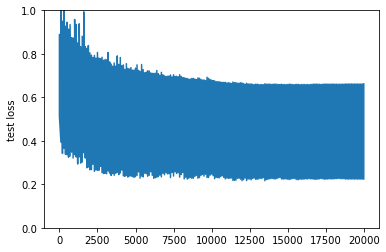

In [10]:
plt.ylim(0, 1.0)
plt.plot(index_test_list,test_losses)
plt.ylabel('test loss')

plt.show()

In [11]:
torch.save(DiscriminatorNet, "save/Deep_learning_D_3_2")
if(Is_GAN):
    torch.save(GeneratorNet, "save/Deep_learning_G_3_2")

In [12]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = DiscriminatorNet.calculate(torch.tensor(testing_data[index][i]).to(dev).type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))
print(sum(result_list)/len(result_list))

2.653570532798767 1.991856336593628 0.6617141962051392
2.207050518409603


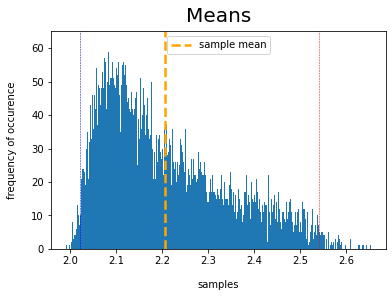

In [13]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [14]:
#Generate 10000 testing data on GeneratorNet

In [15]:
GeneratorNet = torch.load("save/Deep_learning_G_3_1")
def appen_test_G(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data_G.append(temp_list)
    testing_label_G.append(S)
# fake painting from G (random ideas)

def read_testing_data_G():
    for i in range(10000):
        #appen_test_G(sorted(np.random.rand(Agent_number_n), reverse=True));
        G_ideas = torch.randn(N_IDEAS).to(dev)  # random ideas\n
        G_values = GeneratorNet(G_ideas)
        G_values , indices = torch.sort(G_values, descending=True)
        appen_test_G(G_values.detach().cpu().numpy()) 
        
testing_data_G = []
testing_label_G = []
read_testing_data_G()
testing_data_G=np.array(testing_data_G)
testing_label_G=np.array(testing_label_G)
print(testing_data_G)
print(testing_label_G)

[[[2.41502653e-06 1.31108038e-06]
  [5.39775908e-01 1.31108038e-06]
  [5.39775908e-01 2.41502653e-06]]

 [[9.32464361e-01 9.29506361e-01]
  [9.79195118e-01 9.29506361e-01]
  [9.79195118e-01 9.32464361e-01]]

 [[2.70707090e-03 6.57950877e-04]
  [1.01103164e-01 6.57950877e-04]
  [1.01103164e-01 2.70707090e-03]]

 ...

 [[8.73932779e-01 8.17286611e-01]
  [9.87229526e-01 8.17286611e-01]
  [9.87229526e-01 8.73932779e-01]]

 [[4.91796993e-03 2.74618901e-03]
  [8.78117740e-01 2.74618901e-03]
  [8.78117740e-01 4.91796993e-03]]

 [[7.00497091e-01 5.45129120e-01]
  [9.85441566e-01 5.45129120e-01]
  [9.85441566e-01 7.00497091e-01]]]
[1.         2.84116584 1.         ... 2.67844892 1.         2.23106778]


In [16]:
result_list_G = []
for index in range(len(testing_data_G)):
    h_list = []
    for i in range(Agent_number_n):
        h = DiscriminatorNet.calculate(torch.tensor(testing_data_G[index][i]).to(dev).type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list_G.append(sum(h_list)/testing_label_G[index])
    

print(max(result_list_G),min(result_list_G),max(result_list_G)-min(result_list_G))
print(sum(result_list_G)/len(result_list_G))

2.689106203188881 1.990721583366394 0.698384619822487
2.204920443152347


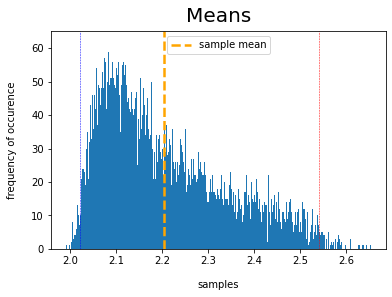

In [17]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list_G)/len(result_list_G), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list_G)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list_G)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()